In [13]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


df=pd.read_csv("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv",encoding='latin-1',sep=';')
data2 = np.loadtxt("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv",encoding='latin-1', delimiter=';', skiprows=1, usecols=(9, 10, 11), dtype=float)
df.head()


,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [14]:
feats= ['Ngày','9','10','11']
df[feats].head()


,Ngày,9,10,11
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.1,1002.1,1010.8
4,01/05/2021,1061.5,1061.5,1061.5


In [15]:
feats1= ['9','10','11']
df[feats1].head()

,9,10,11
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.1,1002.1,1010.8
4,1061.5,1061.5,1061.5


In [16]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)



Model is not converging.  Current: 14051.500928674346 is not greater than 14167.54827918519. Delta is -116.0473505108439


Start probabilities:  [0. 1.]
Transition matrix:  [[0.         1.        ]
 [0.00831025 0.99168975]]
Means:  [[1007.93333333 1007.9        1011.96666667]
 [1040.5461326  1040.5461326  1040.5461326 ]]
Covariances:  [[[ 1499.09888889  1500.57333333  1542.06777778]
  [ 1500.57333333  1502.05        1543.68      ]
  [ 1542.06777778  1543.68        1598.08555556]]

 [[11097.07284416 11097.07284416 11097.07284416]
  [11097.07284416 11097.07284416 11097.07284416]
  [11097.07284416 11097.07284416 11097.07284416]]]


In [17]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Sampled observations:  [[1204.10036627 1204.10036564 1204.10036564]
 [1082.19157777 1082.19157994 1082.19157994]
 [ 899.76831075  899.76831019  899.76831019]
 [1121.75577012 1121.75577007 1121.75577007]
 [ 936.49018131  936.49017902  936.49017

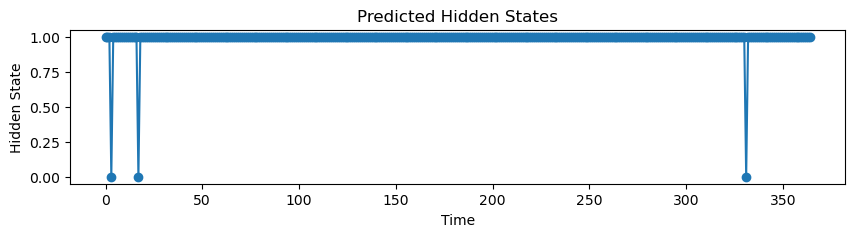

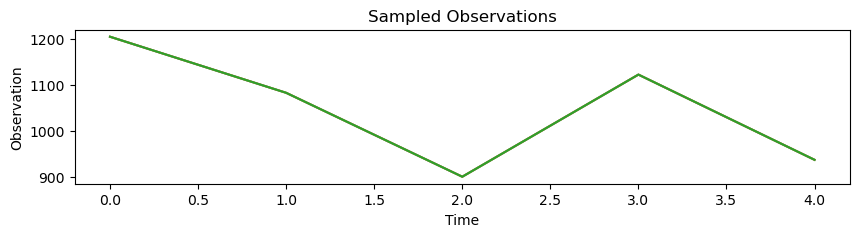

In [18]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [22]:

# from scipy.signal import KalmanFilter
from filterpy.kalman import KalmanFilter

# Check the head of the DataFrame for the specified columns
# print(df[feats1].head())

# Get data for columns 8, 9, 10
observations = df[feats1].values

# Define the Kalman Filter model
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0),
                  n_dim_obs=observations.shape[1])

# Estimate the states
state_means, state_covariances = kf.em(observations).filter(observations)

# Debugging information
print("Shape of observations:", observations.shape)
print("Shape of state_means:", state_means.shape)

# Plot the results for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(feats1):
    plt.subplot(len(feats1), 1, i+1)
    plt.plot(df['Ngày'], observations[:, i], 'r', label='Observations')
    plt.plot(df['Ngày'], state_means[:, i], 'b', label='Kalman Filter')
    plt.title(f'Kalman Filter results for column {col}')
    plt.legend()

plt.tight_layout()
plt.show()


TypeError: KalmanFilter.__init__() got an unexpected keyword argument 'initial_state_mean'